# House price prediction using Linear Regression



### Environment Set Up

In [15]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

### Load Dataset

In [16]:
# Load the dataset
df = pd.read_csv('train.csv')

In [17]:
# Inspect the first few rows
print(df.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

### Data Preprocessing

In [18]:
# Check for missing values
print(df.isnull().sum())

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64


In [19]:
# Drop rows with missing values in relevant columns
df = df.dropna(subset=['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice'])

In [20]:
# Select relevant columns for the model
df = df[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

### Visualization

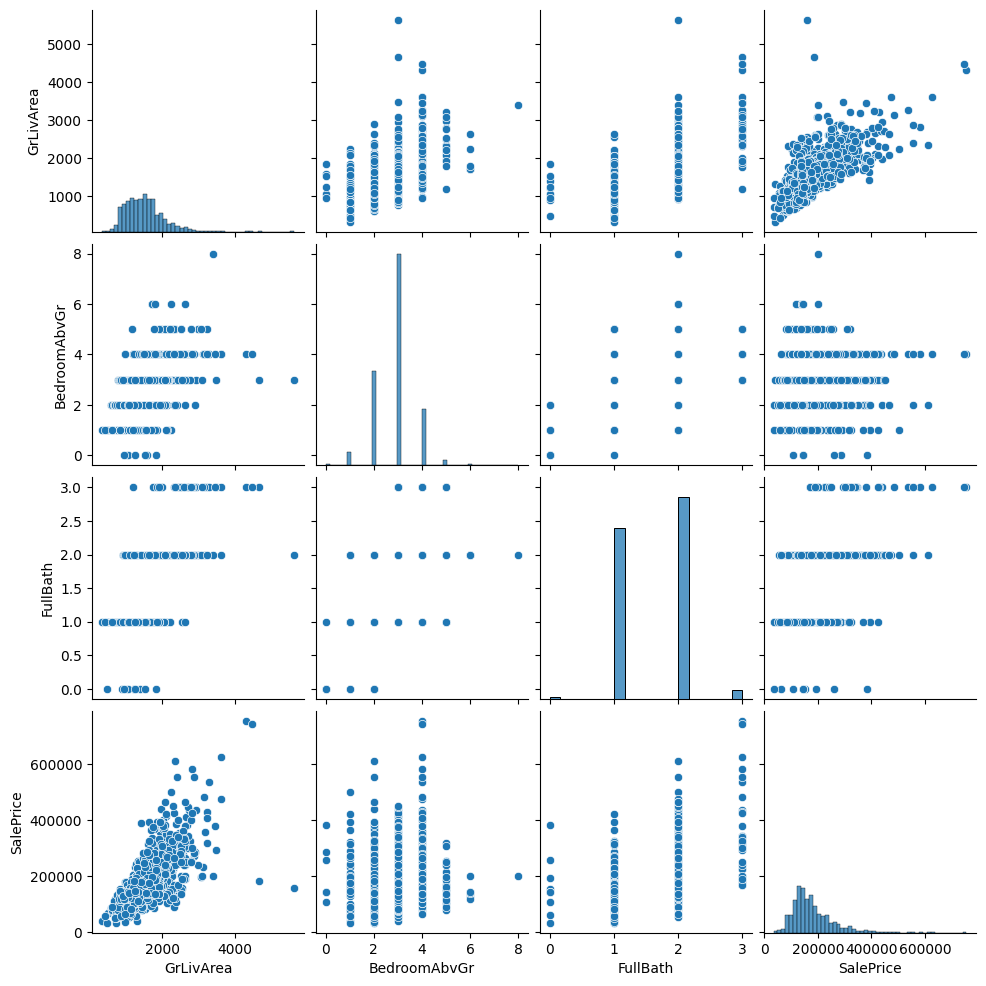

In [21]:
# Visualize the correlation between variables
sns.pairplot(df)
plt.show()

In [22]:
# Correlation matrix
print(df.corr())

              GrLivArea  BedroomAbvGr  FullBath  SalePrice
GrLivArea      1.000000      0.521270  0.630012   0.708624
BedroomAbvGr   0.521270      1.000000  0.363252   0.168213
FullBath       0.630012      0.363252  1.000000   0.560664
SalePrice      0.708624      0.168213  0.560664   1.000000


### Model Creation

In [23]:
# Apply log transformation to the target variable (SalePrice)
df['SalePrice_log'] = np.log(df['SalePrice'])  # Create a log-transformed target variable

# Define features (X) and the log-transformed target (y)
X = df[['GrLivArea', 'BedroomAbvGr', 'FullBath']]  # Features (example)
y = df['SalePrice_log']  # Using log-transformed house price

In [24]:

# Apply feature scaling (Standardization) to the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

# Train-test split after scaling the features
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model with scaled features and log-transformed target variable
model.fit(X_train, y_train)  # Ensure you're using scaled features (X_train) and log-transformed target (y_train)

LinearRegression()

### Predictions

In [29]:
# Train the linear regression model
model.fit(X_train, y_train)

# Make predictions on the test set (log-transformed predictions)
y_pred_log = model.predict(X_test)

# Convert predictions from log scale back to original scale
y_pred = np.exp(y_pred_log)

# Create a DataFrame to compare Actual vs Predicted
comparison_df = pd.DataFrame({'Actual': np.exp(y_test), 'Predicted': y_pred})

# Display the first few rows of the comparison
print(comparison_df.head())

        Actual      Predicted
892   154500.0  119374.181540
1105  325000.0  302632.123917
413   115000.0  130647.226838
522   159000.0  191821.292037
1036  315500.0  209536.556379


### Evaluation

In [30]:
# Evaluate the model using Mean Squared Error and R-squared
mse_lr = mean_squared_error(np.exp(y_test), y_pred_lr)  # Convert y_test back from log scale
r2_lr = r2_score(np.exp(y_test), y_pred_lr)  # Convert y_test back from log scale

print(f"Linear Regression MSE: {mse_lr}")
print(f"Linear Regression R-squared: {r2_lr}")

Linear Regression MSE: 2783650138.9916215
Linear Regression R-squared: 0.6370884283404621
